Tabel Statistik Kategori:
                    Kategori  Jumlah Gambar
0                 Harungguan             23
1                       Puca             10
2                      sadum             10
3                      Sadum              7
4                       puca              4
5   Harungguan Coklat Terang              1
6            Harungguan Biru              1
7            Harungguan Ungu              1
8          Harungguan Orange              1
9           Harungguan Merah              1
10          Harungguan Hijau              1
11               Puca Orange              1
12                Puca Merah              1
13                 Puca Krim              1
14                 Puca Biru              1


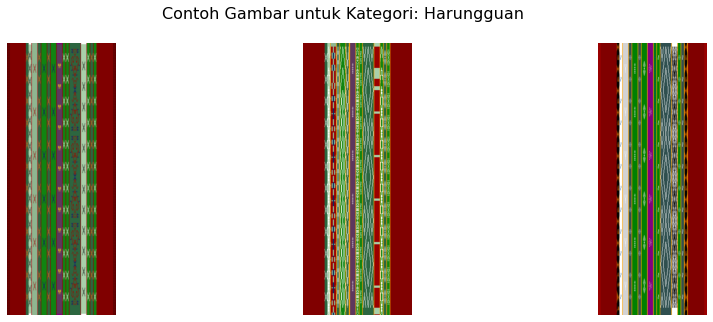

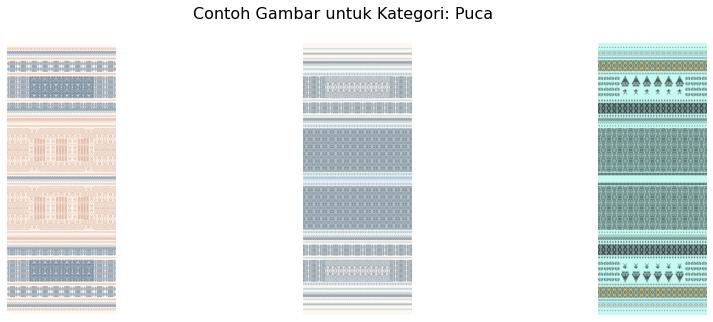

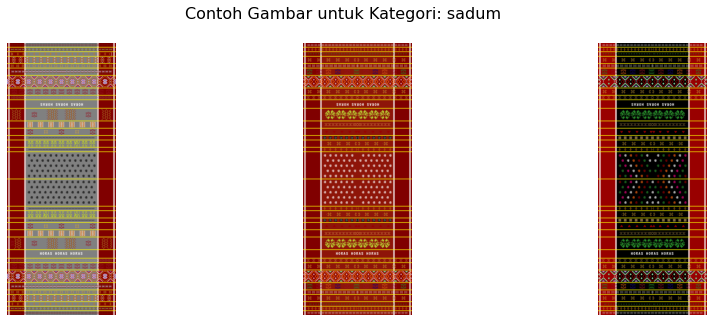

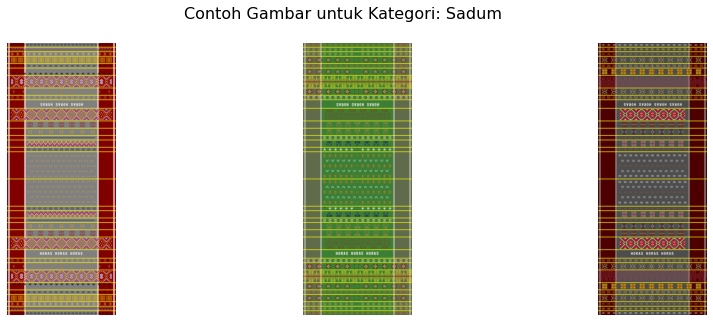

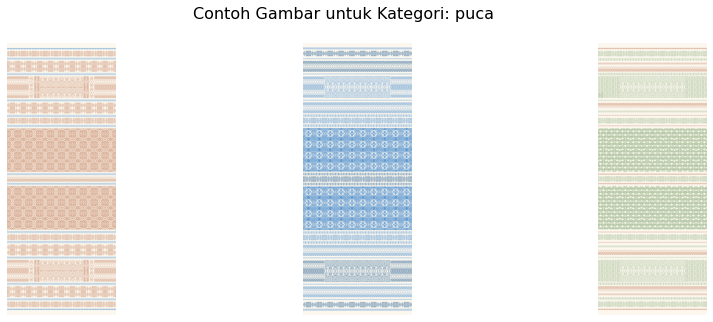

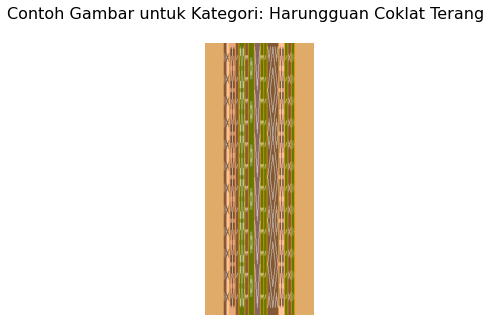

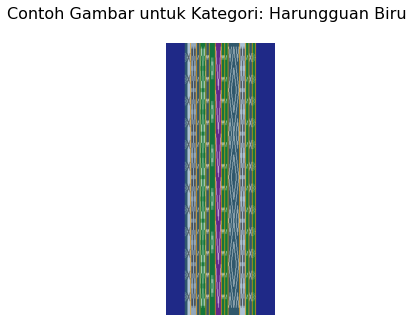

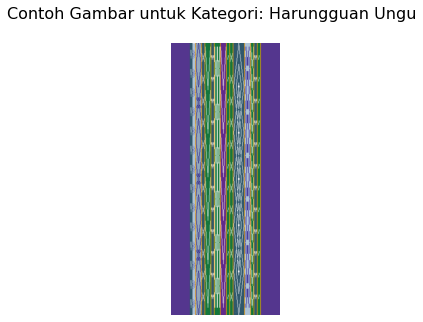

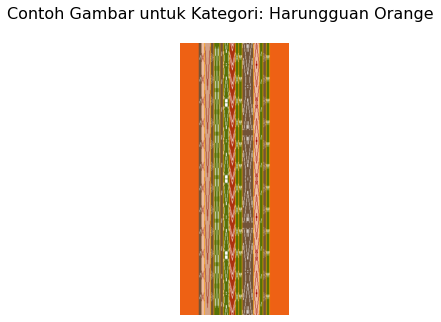

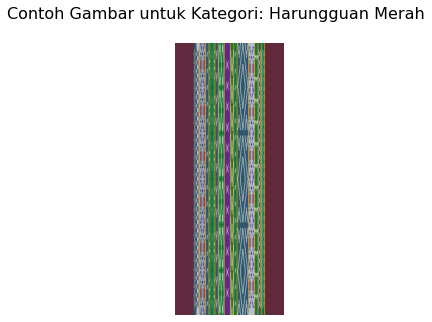

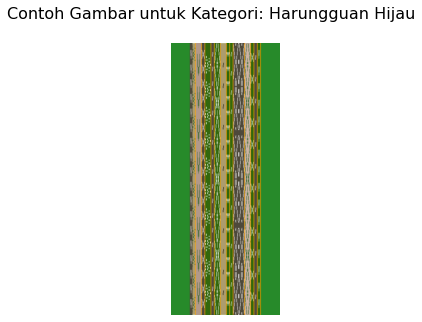

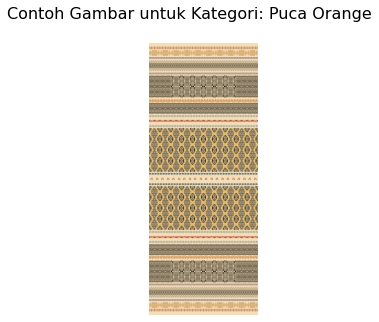

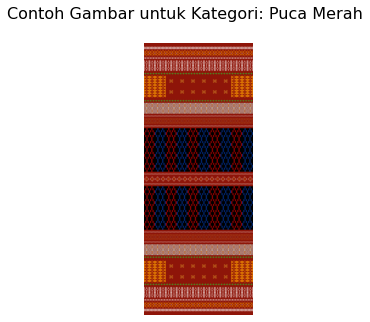

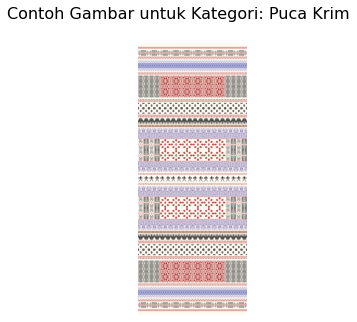

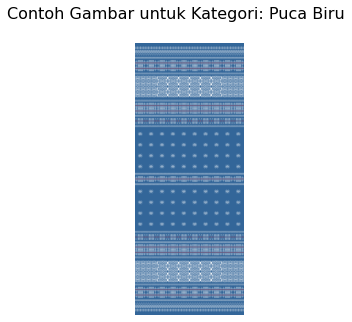

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder dataset
dataset_path = "C:\\Users\\kelur\\Documents\\SEMESTER 7\\DAMI\\PROYEK\\RAW_Dataset\\RAW_Dataset"

# Fungsi untuk membaca semua file dan kategori
def get_image_data(folder_path):
    data = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                category = file.split('_')[0]  # Asumsi kategori ada di awal nama file
                full_path = os.path.join(root, file)
                data.append((category, full_path))
    return data

# Ambil data dari folder
image_data = get_image_data(dataset_path)

# Buat DataFrame
df = pd.DataFrame(image_data, columns=['Kategori', 'Filepath'])

# Hitung jumlah gambar per kategori
category_counts = df['Kategori'].value_counts().reset_index()
category_counts.columns = ['Kategori', 'Jumlah Gambar']

# Tampilkan tabel
print("Tabel Statistik Kategori:")
print(category_counts)

# Fungsi untuk menampilkan beberapa gambar per kategori
def display_sample_images(df, categories, samples_per_category=3):
    for category in categories:
        sample_images = df[df['Kategori'] == category].sample(
            min(samples_per_category, len(df[df['Kategori'] == category]))
        )
        
        # Buat subplots
        fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
        fig.suptitle(f'Contoh Gambar untuk Kategori: {category}', fontsize=16)
        
        # Jika hanya satu gambar, buat axes menjadi iterable
        if len(sample_images) == 1:
            axes = [axes]
        
        # Tampilkan gambar
        for ax, (_, row) in zip(axes, sample_images.iterrows()):
            img = Image.open(row['Filepath'])
            ax.imshow(img)
            ax.axis('off')
        plt.show()


# Ambil kategori unik
unique_categories = category_counts['Kategori'].tolist()

# Tampilkan contoh gambar untuk setiap kategori
display_sample_images(df, unique_categories)

Jumlah Data Total: 54
Jumlah Data Training: 43
Jumlah Data Testing: 11

Statistik Data Training:
Kategori
Harungguan    18
sadum          8
Puca           8
Sadum          6
puca           3
Name: count, dtype: int64

Statistik Data Testing:
Kategori
Harungguan    5
Puca          2
sadum         2
puca          1
Sadum         1
Name: count, dtype: int64
Semua Gambar Training:


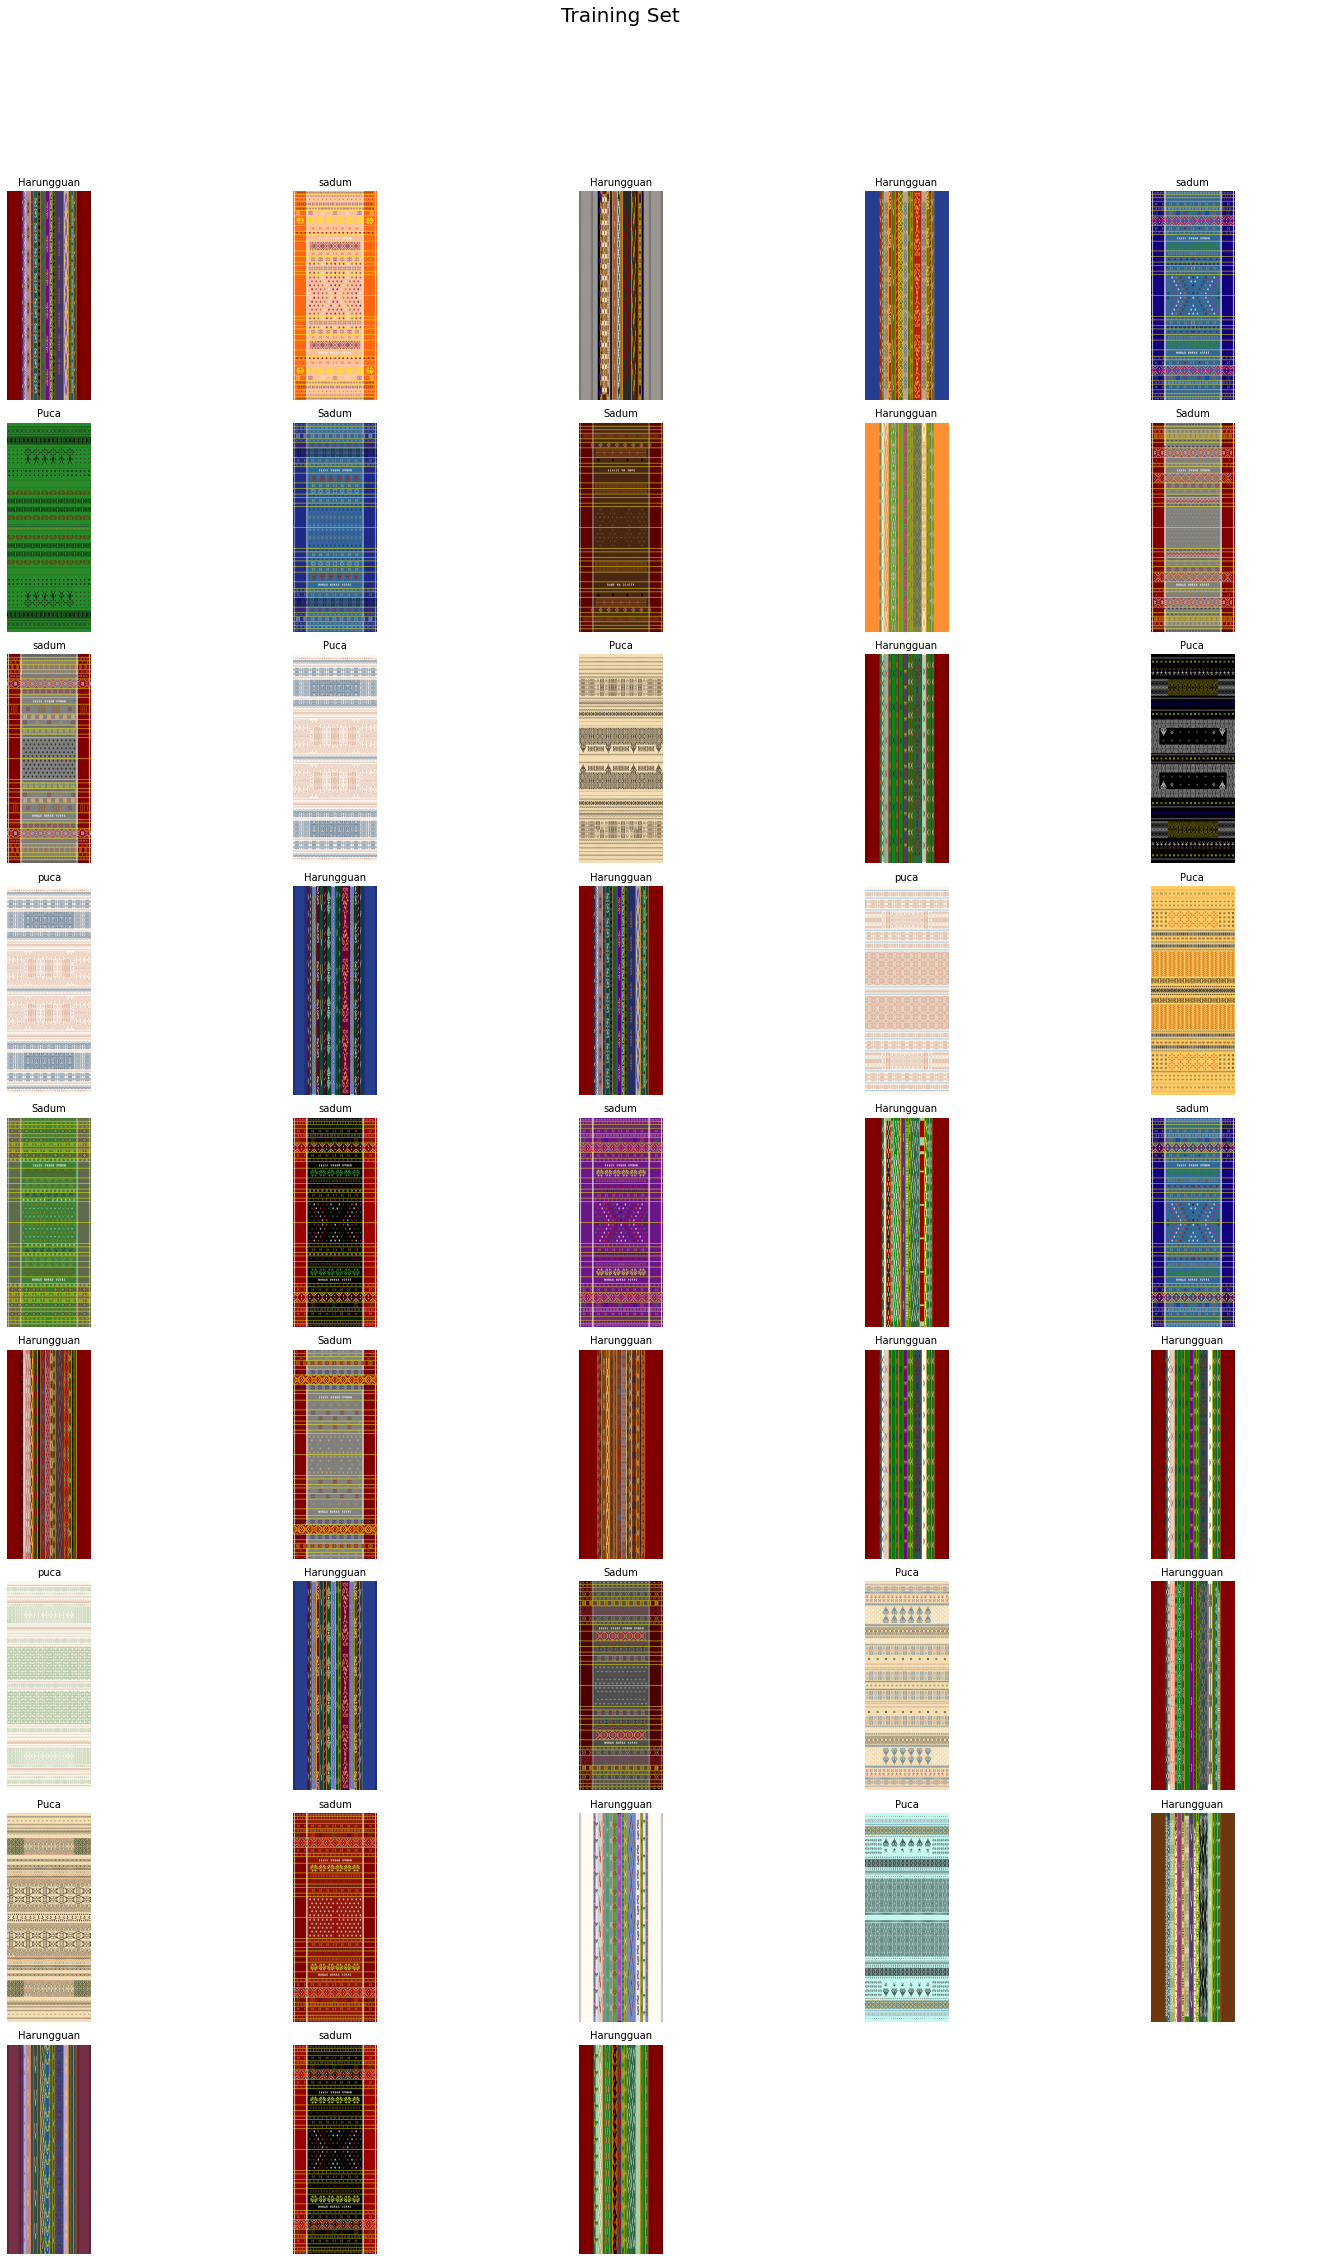

Semua Gambar Testing:


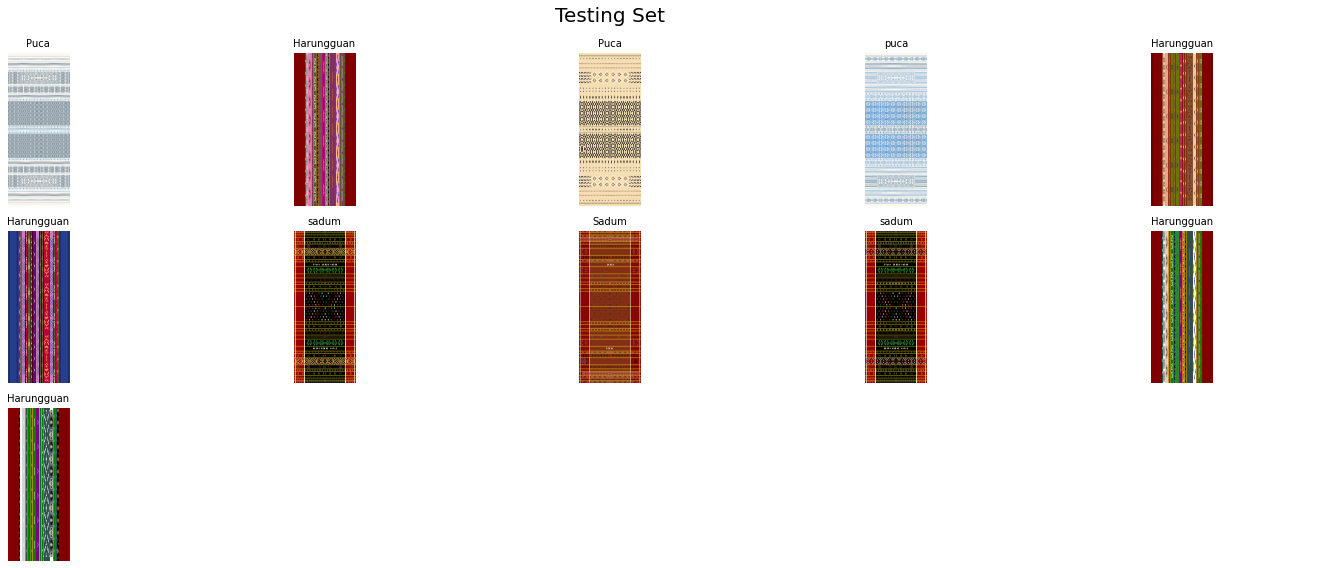

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image
import matplotlib.pyplot as plt

# Path ke folder dataset
dataset_path = r'C:\Users\kelur\Documents\SEMESTER 7\DAMI\PROYEK\RAW_Dataset\RAW_Dataset'

# Path untuk menyimpan dataset terpisah
output_train_path = r'C:\Users\kelur\Documents\SEMESTER 7\DAMI\PROYEK\Train_Dataset'
output_test_path = r'C:\Users\kelur\Documents\SEMESTER 7\DAMI\PROYEK\Test_Dataset'

# Pastikan folder output ada
os.makedirs(output_train_path, exist_ok=True)
os.makedirs(output_test_path, exist_ok=True)

# Fungsi untuk membaca semua file dan kategori
def get_image_data(folder_path):
    data = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Cek format gambar
                category = file.split('_')[0]  # Asumsi kategori ada di awal nama file
                full_path = os.path.join(root, file)
                data.append((category, full_path))
    return data

# Fungsi untuk menyalin file ke folder
def copy_files(df, output_path):
    for _, row in df.iterrows():
        category_folder = os.path.join(output_path, row['Kategori'])
        os.makedirs(category_folder, exist_ok=True)
        shutil.copy(row['Filepath'], category_folder)

# Fungsi untuk menampilkan semua gambar
def display_all_images(df, title):
    """
    Menampilkan semua gambar dari DataFrame
    """
    total_images = len(df)
    fig, axes = plt.subplots(nrows=(total_images // 5) + 1, ncols=5, figsize=(20, (total_images // 5) * 4))
    fig.suptitle(title, fontsize=20)
    
    # Flatten axes untuk iterasi lebih mudah
    axes = axes.flatten() if total_images > 1 else [axes]
    
    for ax, (_, row) in zip(axes, df.iterrows()):
        img = Image.open(row['Filepath'])
        ax.imshow(img)
        ax.set_title(row['Kategori'], fontsize=10)
        ax.axis('off')
    
    # Sembunyikan sisa axes jika gambar tidak mencukupi
    for ax in axes[len(df):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Beri ruang untuk judul
    plt.show()

# Ambil data dari folder
image_data = get_image_data(dataset_path)

# Buat DataFrame
df = pd.DataFrame(image_data, columns=['Kategori', 'Filepath'])

# Hitung jumlah gambar per kategori
category_counts = df['Kategori'].value_counts()

# Buang kategori yang memiliki kurang dari 2 gambar
valid_categories = category_counts[category_counts >= 2].index
df = df[df['Kategori'].isin(valid_categories)]

# Membagi data menjadi Training dan Testing
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Kategori'], random_state=42)

# Salin file ke folder Train dan Test
copy_files(train_df, output_train_path)
copy_files(test_df, output_test_path)

# Statistik data
print(f"Jumlah Data Total: {len(df)}")
print(f"Jumlah Data Training: {len(train_df)}")
print(f"Jumlah Data Testing: {len(test_df)}")

# Tabel Statistik Training
print("\nStatistik Data Training:")
print(train_df['Kategori'].value_counts())

# Tabel Statistik Testing
print("\nStatistik Data Testing:")
print(test_df['Kategori'].value_counts())

# Tampilkan semua gambar dari data Training
print("Semua Gambar Training:")
display_all_images(train_df, title="Training Set")

# Tampilkan semua gambar dari data Testing
print("Semua Gambar Testing:")
display_all_images(test_df, title="Testing Set")